
# Régression linéaire — OLS, Ridge, Lasso

Ce notebook rappelle les formules mathématiques et montre des exemples pratiques avec `scikit-learn`.



## 1. OLS (moindres carrés ordinaires)

$$
\min_{\beta_0,\beta}\; \sum_{i=1}^n \Big(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\Big)^2
$$

Solution fermée si \(X^\top X\) inversible :  
$$
\hat\beta_{\text{OLS}} = (X^\top X)^{-1} X^\top y
$$



## 2. Ridge (régularisation L2)

$$
\min_{\beta_0,\beta}\; \sum_{i=1}^n \Big(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\Big)^2
\;+\; \lambda \sum_{j=1}^p \beta_j^2
$$

- Plus λ est grand, plus les coefficients sont **réduits** vers zéro.
- Aucun coefficient n'est exactement nul.



## 3. Lasso (régularisation L1)

\[
\min_{\beta_0,\beta}\; \sum_{i=1}^n \Big(y_i - \beta_0 - \sum_{j=1}^p \beta_j x_{ij}\Big)^2
\;+\; \lambda \sum_{j=1}^p |\beta_j|
\]

- Certains coefficients deviennent **exactement nuls** → sélection de variables.


In [15]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
n, p = 200, 10
X = rng.normal(size=(n, p))
true_beta = np.array([2.0, 0.0, -1.5, 0.0, 1.2, 0.0, 0.8, 0.0, 0.0, 0.0])
y = 1.5 + X @ true_beta + rng.normal(0, 1.0, size=n)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 4. Exemple OLS

In [16]:

ols = make_pipeline(StandardScaler(), LinearRegression())
ols.fit(X_train, y_train)
y_pred = ols.predict(X_test)

print("Coefficients OLS:", np.round(ols[-1].coef_, 3))
print("Intercept OLS:", round(ols[-1].intercept_, 3))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


Coefficients OLS: [ 2.035  0.083 -1.397  0.055  1.182 -0.239  0.882 -0.074 -0.14  -0.076]
Intercept OLS: 1.404
Test RMSE: 1.0084171727915192
Test R²: 0.9156803433485868


## 5. Exemple Ridge

In [18]:

alphas = np.logspace(-3, 3, 30)
ridge = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas, scoring='neg_mean_squared_error'))
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print("Alpha choisi:", ridge[-1].alpha_)
print("Coefficients Ridge:", np.round(ridge[-1].coef_, 3))
print("Intercept Ridge:", round(ridge[-1].intercept_, 3))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


Alpha choisi: 1.2689610031679222
Coefficients Ridge: [ 2.016  0.083 -1.385  0.054  1.169 -0.238  0.874 -0.068 -0.139 -0.074]
Intercept Ridge: 1.404
Test RMSE: 1.010778235667482
Test R²: 0.9152850365656164


## 6. Exemple Lasso

In [19]:

alphas = np.logspace(-3, 0, 30)
lasso = make_pipeline(StandardScaler(), LassoCV(alphas=alphas, max_iter=5000, cv=5, random_state=0))
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print("Alpha choisi:", lasso[-1].alpha_)
print("Coefficients Lasso:", np.round(lasso[-1].coef_, 3))
print("Intercept Lasso:", round(lasso[-1].intercept_, 3))
print("Test RMSE:", root_mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))


Alpha choisi: 0.010826367338740546
Coefficients Lasso: [ 2.024  0.066 -1.385  0.039  1.173 -0.226  0.866 -0.06  -0.128 -0.059]
Intercept Lasso: 1.404
Test RMSE: 1.0108299811586239
Test R²: 0.915276362596506


## 7. Comparaison visuelle des coefficients

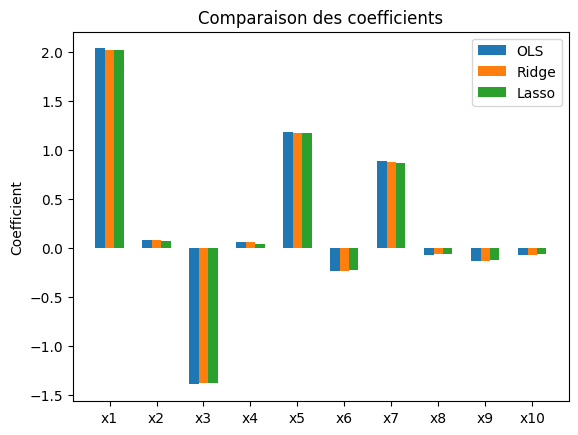

In [20]:

coef_ols = ols[-1].coef_
coef_ridge = ridge[-1].coef_
coef_lasso = lasso[-1].coef_
indices = np.arange(len(coef_ols))

plt.figure()
plt.bar(indices-0.2, coef_ols, width=0.2, label="OLS")
plt.bar(indices, coef_ridge, width=0.2, label="Ridge")
plt.bar(indices+0.2, coef_lasso, width=0.2, label="Lasso")
plt.xticks(indices, [f"x{j+1}" for j in indices])
plt.ylabel("Coefficient")
plt.title("Comparaison des coefficients")
plt.legend()
plt.show()
